<h2> Logistic-regression </h2>
<a href="https://colab.research.google.com/github/thedhruvish/ml-algorithms-project/blob/main/logistic-regression/project-1.ipynb">
<img src="https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/public/colab.svg" alt="colab svg"></a>

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thedhruvish/dataset-machine-learning/refs/heads/main/ml-algorithms-project/BreastCancer.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [4]:
df.drop(columns=['Id'],inplace=True)

In [5]:
df.isnull().sum()

Cl.thickness        0
Cell.size           0
Cell.shape          0
Marg.adhesion       0
Epith.c.size        0
Bare.nuclei        16
Bl.cromatin         0
Normal.nucleoli     0
Mitoses             0
Class               0
dtype: int64

In [6]:
df[df['Bare.nuclei'].isnull()]

,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
23,8,4,5,1,2,NaN,7,3,1,1
40,6,6,6,9,6,NaN,7,8,1,0
139,1,1,1,1,1,NaN,2,1,1,0
145,1,1,3,1,2,NaN,2,1,1,0
158,1,1,2,1,3,NaN,1,1,1,0
164,5,1,1,1,2,NaN,3,1,1,0
235,3,1,4,1,2,NaN,3,1,1,0
249,3,1,1,1,2,NaN,3,1,1,0
275,3,1,3,1,2,NaN,2,1,1,0
292,8,8,8,1,2,NaN,6,10,1,1


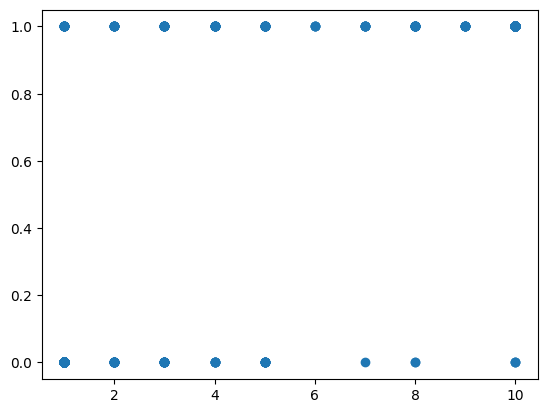

In [7]:
plt.scatter(df['Bare.nuclei'],df['Class'])

In [8]:
df['Bare.nuclei'].describe()

count    683.000000
mean       3.544656
std        3.643857
min        1.000000
25%        1.000000
50%        1.000000
75%        6.000000
max       10.000000
Name: Bare.nuclei, dtype: float64

In [9]:
df['Bare.nuclei'] = df['Bare.nuclei'].fillna(1)

In [10]:
df.isnull().sum()

Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

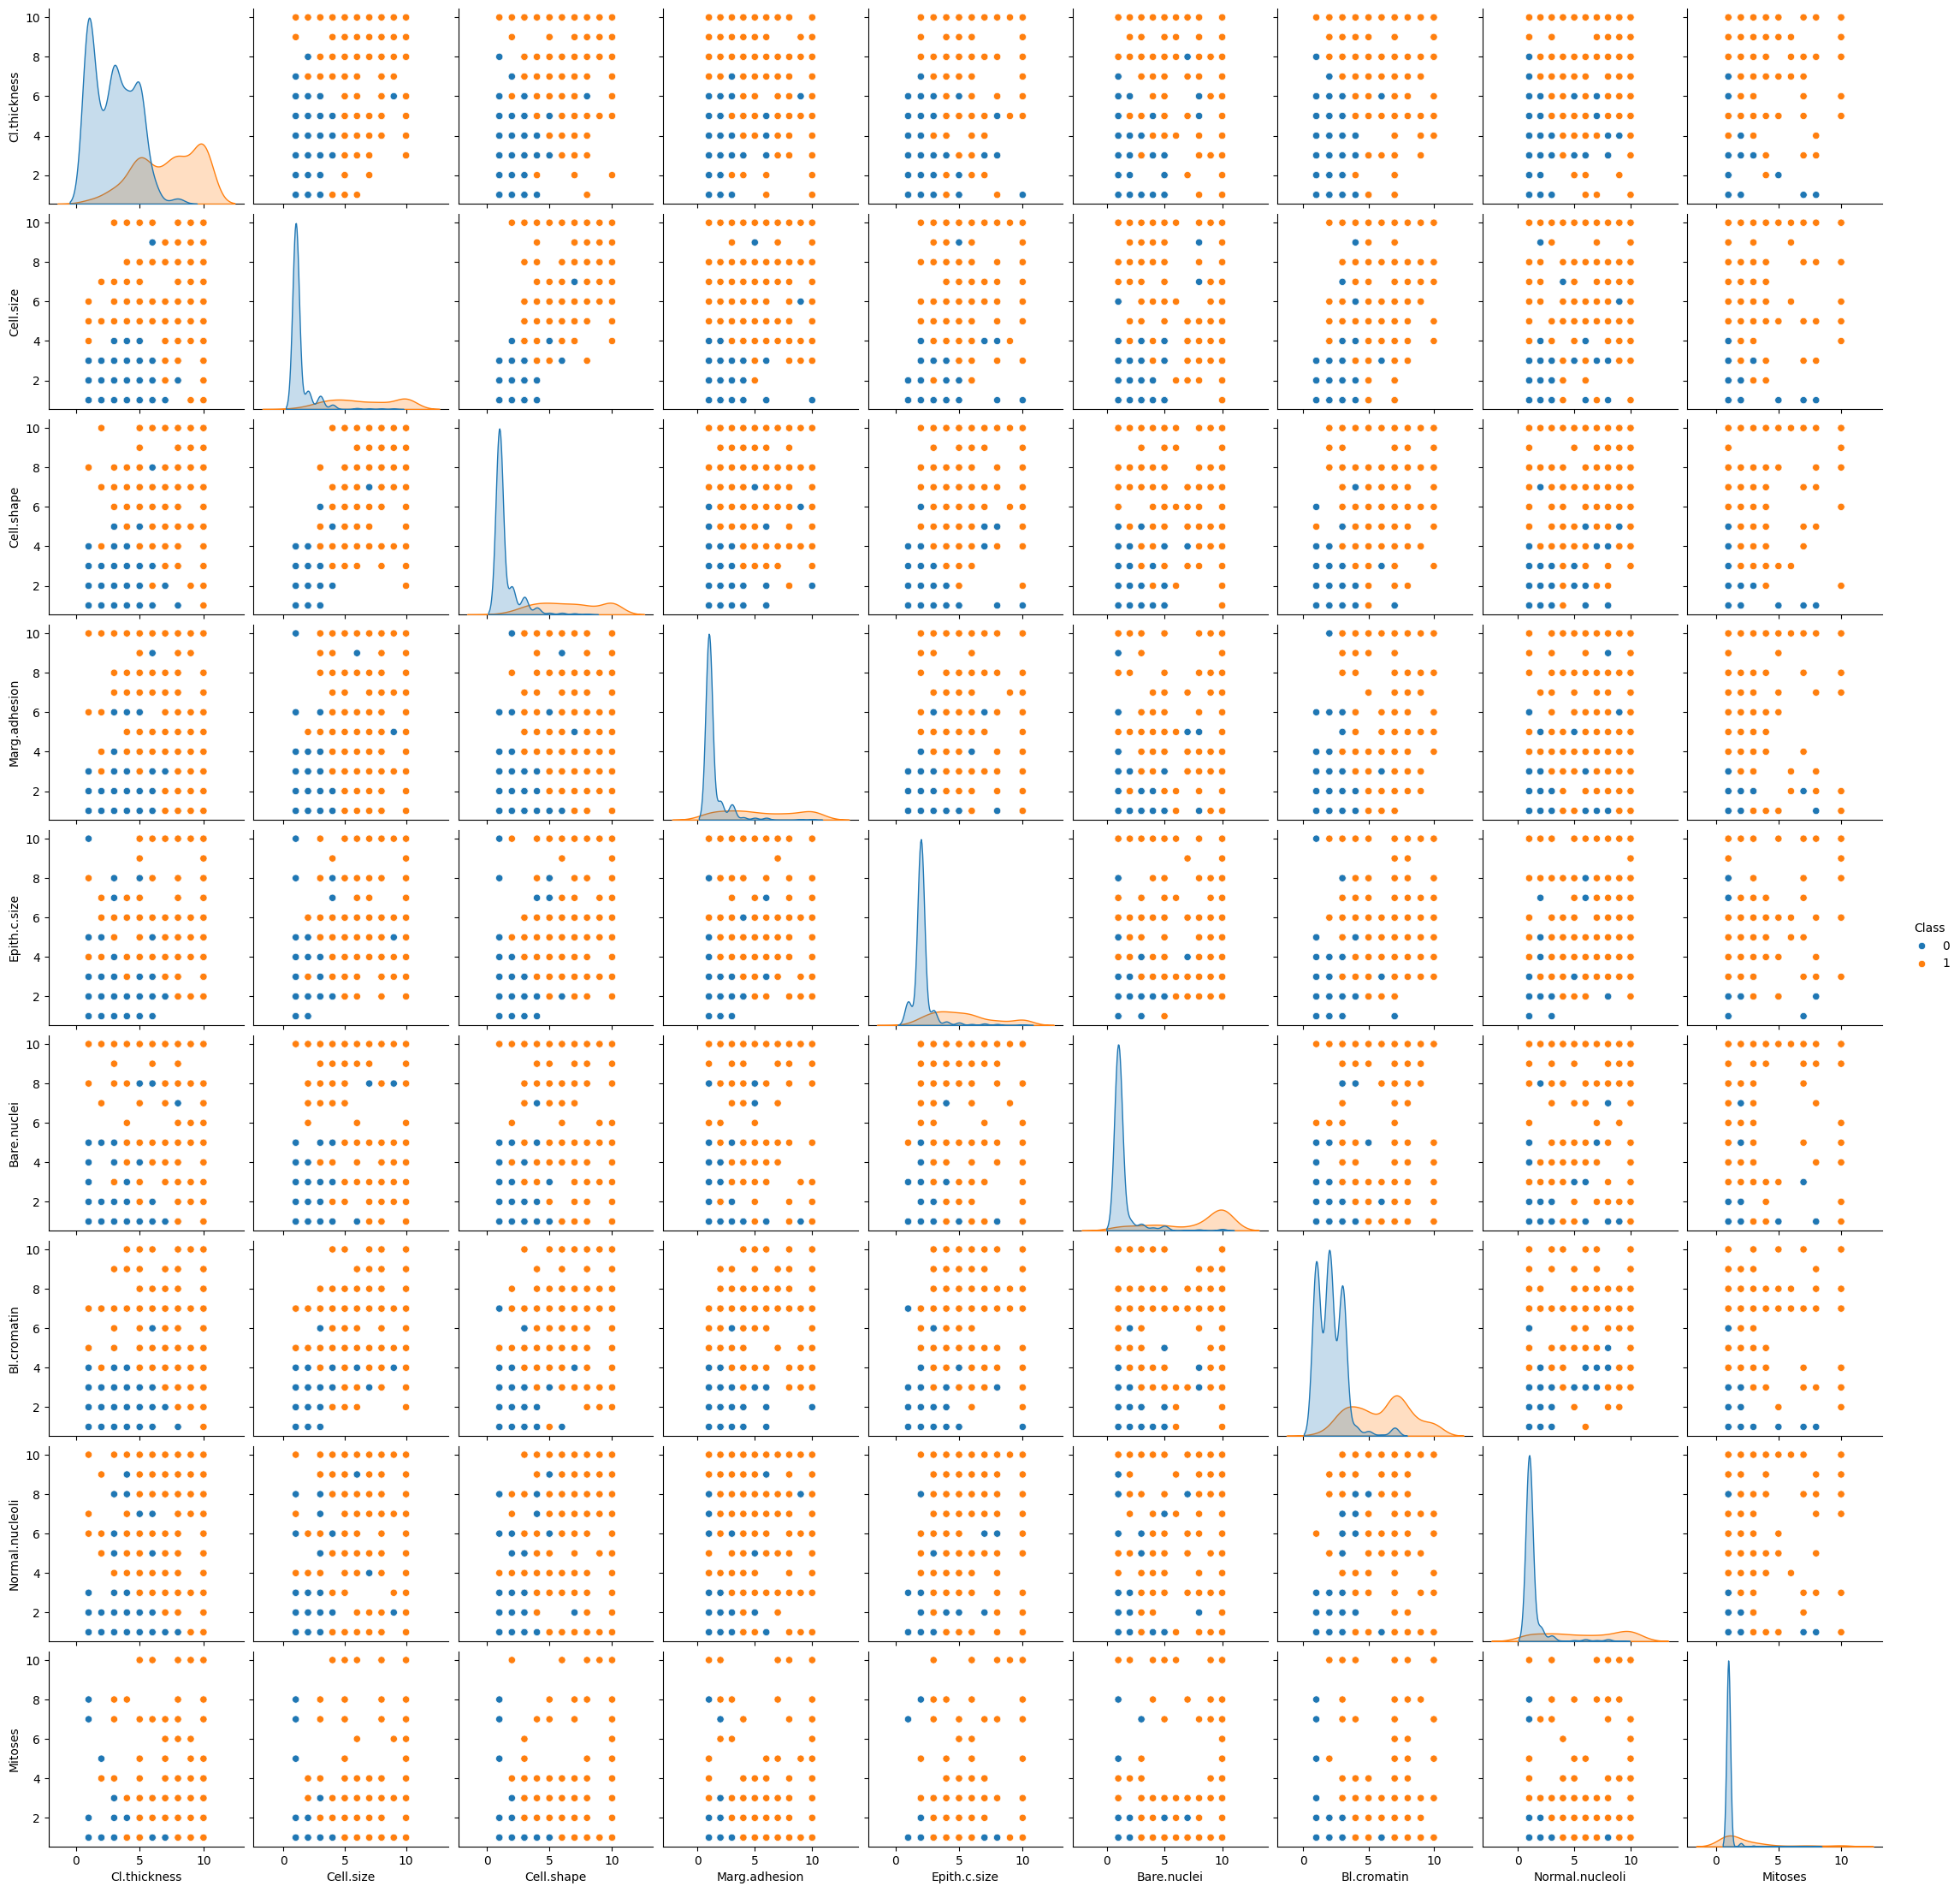

In [11]:
sns.pairplot(df,hue='Class')

In [12]:
# Feture section
X = df.drop(columns=['Class'])
y = df['Class']

In [13]:
# train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=51)

In [14]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [15]:
model.fit(X_train,y_train)

LogisticRegression()

In [16]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1])

## metrics 

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [18]:
acc = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}")


Accuracy: 0.99


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        92
           1       0.96      1.00      0.98        48

    accuracy                           0.99       140
   macro avg       0.98      0.99      0.98       140
weighted avg       0.99      0.99      0.99       140



Accuracy is 98.57142857142858
[[90  2]
 [ 0 48]]


<Axes: >

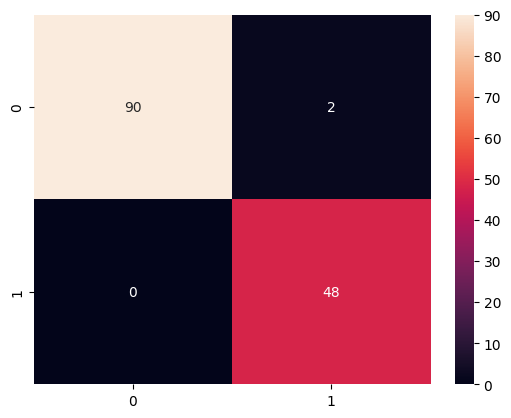

In [20]:
print("Accuracy is", model.score(X_test, y_test)*100)

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm, annot=True)